In [9]:
from __future__ import division, unicode_literals, print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims
import trackpy as tp
import os.path

# %matplotlib notebook for interactive plot
%matplotlib inline

# Tweak styles..
mpl.rc('figure', figsize=(10,5))
mpl.rc('image', cmap='gray')

(1300, 1700)

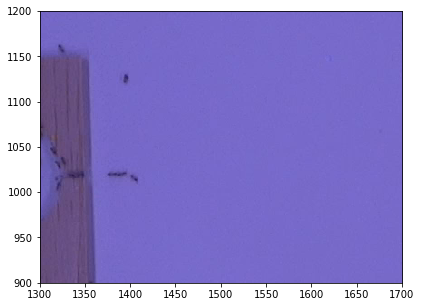

In [256]:
inFileName = '../../Dropbox (ASU)/TandemRuns/data/videos/TR-T1-001.mp4'
if not os.path.isfile(inFileName):
    print("File not found", inFileName)
    
# Read the video..    
video = pims.Video(inFileName)
selectedFrame = 120
plt.imshow(video[selectedFrame])
plt.ylim(900, 1200)
plt.xlim(1300, 1700)

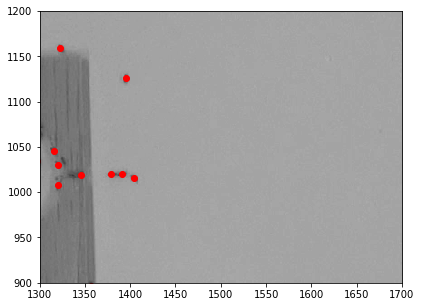

In [199]:
# Pixel size must be odd integer
gsframe = video[selectedFrame][:, :, 0] / 3 + video[selectedFrame][:, :, 1] / 3 + video[selectedFrame][:, :, 2] / 3
f = tp.locate(gsframe, diameter=11, minmass=300, invert=True,
             maxsize=3, threshold=10)

# Make a new plot
plt.figure()
plt.imshow(gsframe)
plt.ylim(900, 1200)
plt.xlim(1300, 1700)
mydata = f[['x','y']].values
plt.scatter(mydata[:, 0], mydata[:, 1], color='r')

(0, 1000)

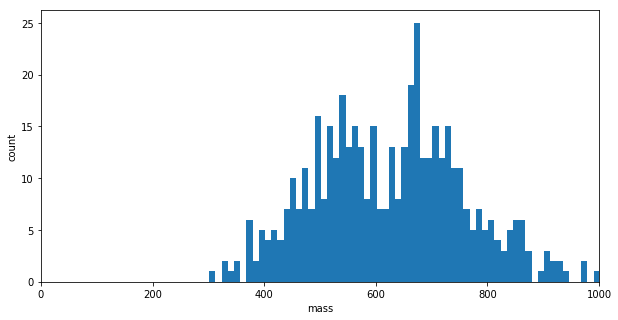

In [197]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=100)
ax.set(xlabel='mass', ylabel='count')
plt.xlim(0, 1000)

In [ ]:
tp.subpx_bias(f)
plt.show()

In [228]:
from pims import pipeline

# The following function is evaluate frame by frame only when 
# necessary (lazy evaluation)
@pipeline
def as_gray(frame, invert=True):
    if (invert):
        red   = 255 - frame[:, :, 0]
        blue  = 255 - frame[:, :, 1]
        green = 255 - frame[:, :, 2]
    else:
        red   = frame[:, :, 0]
        blue  = frame[:, :, 1]
        green = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue
        
# Convert in gray scale the entire video
gsframes = as_gray(video)

In [269]:
# Locate features in a selection of frames
firstFrame = 0
lastFrame  = 25
%timeit df = tp.batch(gsframes[firstFrame:lastFrame], diameter=11, minmass=300, invert=False, maxsize=3, threshold=10, engine='python')

Frame 24: 420 features
1 loop, best of 3: 49.6 s per loop


In [270]:
%timeit df = tp.batch(gsframes[firstFrame:lastFrame], diameter=11, minmass=300, invert=False, maxsize=3, threshold=10, engine='numba')

Frame 24: 420 features
1 loop, best of 3: 1min 9s per loop


In [247]:
dfLink = tp.link_df(df, 10, memory=5)
print('Before:', dfLink['particle'].nunique())

# Filter spurious trajectories..
dfLink = tp.filter_stubs(dfLink, 20)
print('After:', dfLink['particle'].nunique())

Frame 999: 417 trajectories present.
Before: 18016
After: 4888


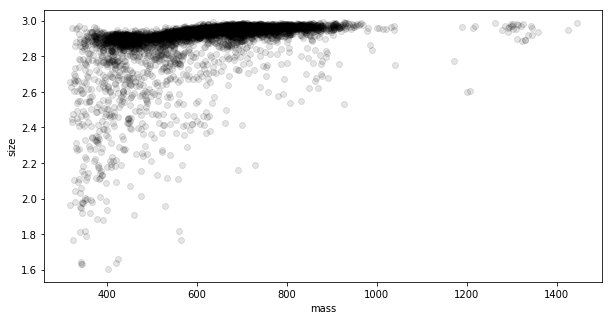

In [248]:
plt.figure()
tp.mass_size(dfLink.groupby('particle').mean())

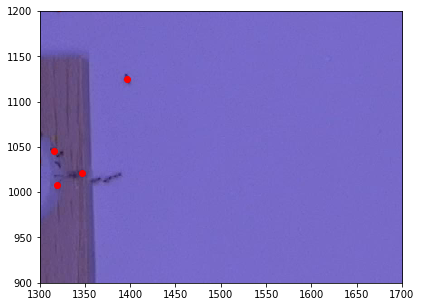

In [249]:
# Make a new plot
plt.figure()
plt.imshow(video[firstFrame])
plt.ylim(900, 1200)
plt.xlim(1300, 1700)
mydata = dfLink[dfLink['frame'] == firstFrame]
mydata = mydata[['x', 'y']].values
plt.scatter(mydata[:, 0], mydata[:, 1], color='r')

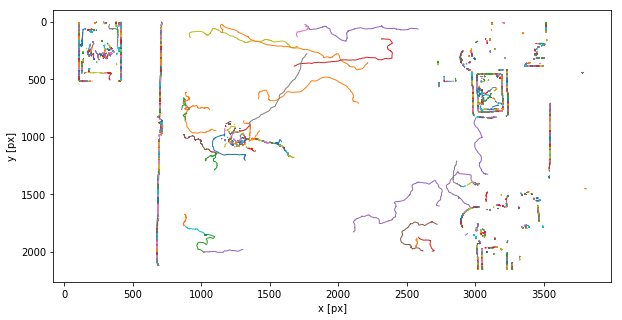

In [250]:
plt.figure()
tp.plot_traj(dfLink)

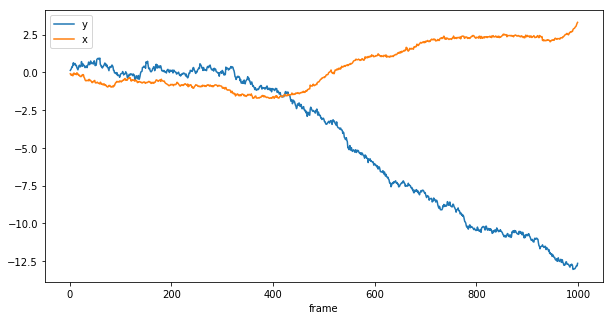

In [253]:
drift = tp.compute_drift(dfLink)
drift.plot()
plt.show()

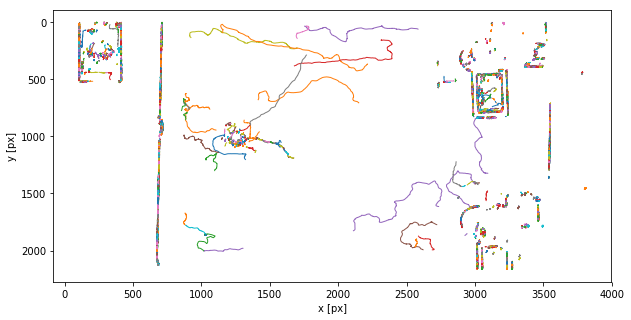

In [258]:
dfLinkD = tp.subtract_drift(dfLink.copy(), drift)

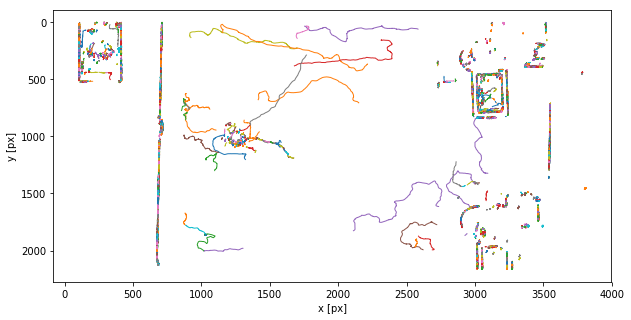

In [261]:
ax = tp.plot_traj(dfLinkD)
plt.show()

In [19]:
import yalm

ImportError: No module named yalm